# Paradigmas y Programación para Ciencia de Datos
## Programa 7.1


Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

Carlo Kiliano Ferrera Guadarrama, Aldo Sebastián Altamirano Vázquez, Edgar Omar Cruz Guitierrez, Leonardo Negrete Mancera



In [8]:
#CARGA Y PREPARACIÓN DE DATOS

# Leemos el archivo CSV (Asegúrate de que el archivo esté en la misma carpeta)
cpi_data <- read.csv("CPIAUCSL.csv")

# Convertimos la columna de datos en una "Serie de Tiempo" (Time Series)
# start = c(1947, 1) significa que empieza en Enero de 1947
# frequency = 12 significa que los datos son mensuales
cpi_ts <- ts(cpi_data$CPIAUCSL, start = c(1947, 1), frequency = 12)

In [9]:
#DEFINICIÓN DE ALGORITMOS

# Función de Media Móvil Simple
# Recibe la serie de datos y 'n' (la ventana de tiempo)
media_movil_manual <- function(serie, n) {
  mov_avg <- numeric(length(serie))

  for (i in seq_along(serie)) {
    # Si estamos en los primeros meses (antes de n), no tenemos suficientes datos
    if (i < n) {
      mov_avg[i] <- NA
    } else {
      # Calculamos el promedio de los últimos 'n' datos
      mov_avg[i] <- mean(serie[(i - n + 1):i])
    }
  }
  return(mov_avg)
}

# Función de Suavizado Exponencial Simple
# Recibe la serie y 'alpha' (el peso que le damos al dato más reciente)
suavizado_exponencial_manual <- function(serie, alpha) {
  suavizado <- numeric(length(serie))

  # El primer valor pronosticado es simplemente el primer valor real
  suavizado[1] <- serie[1]

  # Bucle desde el segundo dato hasta el final
  for (i in 2:length(serie)) {
    # Fórmula: Nuevo Pronóstico = alpha * (Dato Real Anterior) + (1-alpha) * (Pronóstico Anterior)
    suavizado[i] <- alpha * serie[i-1] + (1 - alpha) * suavizado[i-1]
  }
  return(suavizado)
}

In [10]:
#EJECUCIÓN DE LOS MODELOS
# Calculamos la Media Móvil con una ventana de 12 meses (anual)
resultados_mm <- media_movil_manual(cpi_ts, n = 12)

# Calculamos el Suavizado Exponencial con un alpha de 0.2 (suavizado fuerte)
resultados_se <- suavizado_exponencial_manual(cpi_ts, alpha = 0.2)

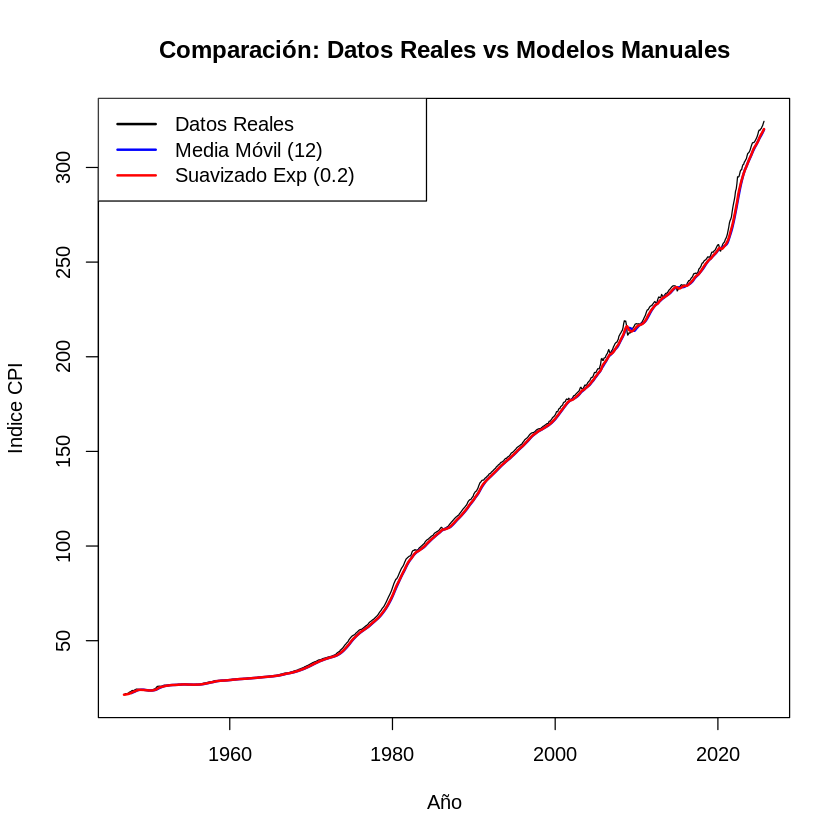

In [11]:
#GRÁFICA COMPARATIVA

# Configuramos el fondo blanco
par(bg = "white")

# Graficamos los datos originales (Línea negra delgada)
plot(cpi_ts,
     main = "Comparación: Datos Reales vs Modelos Manuales",
     ylab = "Indice CPI",
     xlab = "Año",
     col = "black",
     lwd = 1)

# Agregamos la línea de Media Móvil (Azul)
lines(ts(resultados_mm, start = c(1947, 1), frequency = 12),
      col = "blue", lwd = 2)

# Agregamos la línea de Suavizado Exponencial (Rojo)
lines(ts(resultados_se, start = c(1947, 1), frequency = 12),
      col = "red", lwd = 2)

# Ponemos la leyenda para identificar los colores
legend("topleft",
       legend = c("Datos Reales", "Media Móvil (12)", "Suavizado Exp (0.2)"),
       col = c("black", "blue", "red"),
       lty = 1, lwd = 2)

In [12]:
# CÁLCULO DE ERRORES (EVALUACIÓN)

# Función auxiliar para calcular MAE y RMSE ignorando los NA
calcular_metricas <- function(reales, pronosticos) {
  # Filtramos solo donde ambos datos existen (para saltar los NA del principio)
  validos <- !is.na(pronosticos)

  diff <- reales[validos] - pronosticos[validos]

  mae <- mean(abs(diff))        # Error Medio Absoluto
  rmse <- sqrt(mean(diff^2))    # Raíz del Error Cuadrático Medio

  return(c(MAE = mae, RMSE = rmse))
}

# Obtenemos los errores
error_mm <- calcular_metricas(cpi_ts, resultados_mm)
error_se <- calcular_metricas(cpi_ts, resultados_se)

# Imprimimos los resultados
cat("\nRESULTADOS DE ERROR\n")
cat("Interpretación: Entre más bajo sea el número, mejor es el modelo.\n\n")

print("Media Móvil (Manual)")
print(error_mm)

print("Suavizado Exponencial (Manual) ")
print(error_se)

cat("\nCONCLUSIÓN\n")
if(error_se['MAE'] < error_mm['MAE']) {
  cat("EL MEJOR MODELO ES: Suavizado Exponencial.\n")
} else {
  cat("EL MEJOR MODELO ES: Media Móvil.\n")
}


RESULTADOS DE ERROR
Interpretación: Entre más bajo sea el número, mejor es el modelo.

[1] "Media Móvil (Manual)"
     MAE     RMSE 
1.825477 2.473730 
[1] "Suavizado Exponencial (Manual) "
     MAE     RMSE 
1.635008 2.212874 

CONCLUSIÓN
EL MEJOR MODELO ES: Suavizado Exponencial.
